In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')


# Import Data

In [3]:
df = pd.read_excel('Data/Default.xlsx')
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

,default,student,balance,income,default2,student2
1,No,No,729.526495,44361.625074,0,0
2,No,Yes,817.180407,12106.134700,0,1
3,No,No,1073.549164,31767.138947,0,0


# 4.1

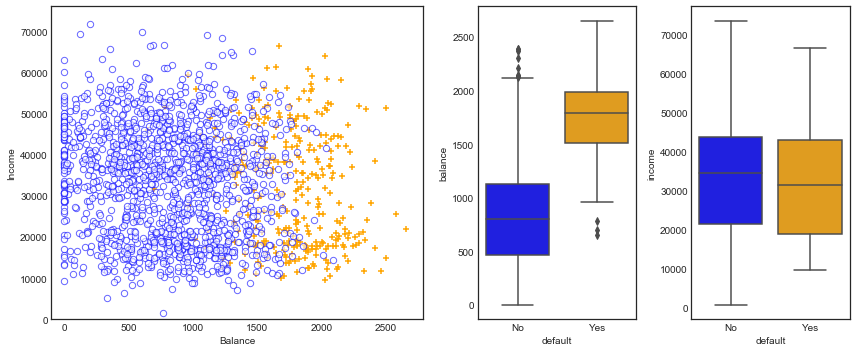

In [4]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1,4)
axis1 = plt.subplot(gs[0,:-2])
axis2 = plt.subplot(gs[0,-2])
axis3 = plt.subplot(gs[0,-1])

#Fraction of value no
df_no = df[df.default2 ==0].sample(frac=0.15)
#Fraction of value yes
df_yes = df[df.default2 ==1]
df_ = df_no.append(df_yes)

axis1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+',  linewidths=1)
axis1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, marker='o',  linewidths=1, edgecolors = 'blue', facecolors='white', alpha=.6)

axis1.set_ylim(bottom=0) #replaces ymin
axis1.set_ylabel('Income')
axis1.set_xlim(left=-100) #replaces xmin
axis1.set_xlabel('Balance')

c_palette = {'No': 'Blue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=axis2, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=axis3, palette=c_palette)
gs.tight_layout(plt.gcf())

## 4.3
### Figure 4.2

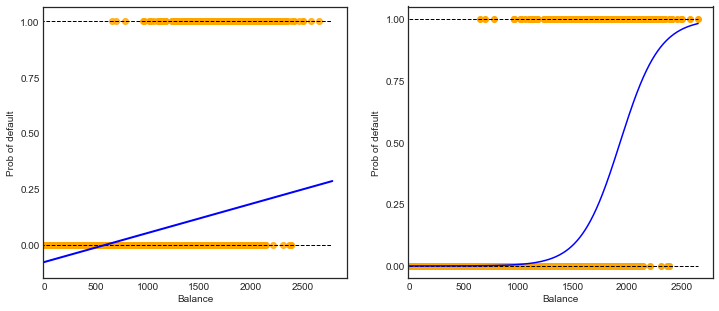

In [5]:
x_train = df.balance.values.reshape(-1,1)
y = df.default2

x_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(x_train,y)
prob=clf.predict_proba(x_test)

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(12,5))

#Left
sns.regplot(df.balance, df.default2, order=1, ci=None,
           scatter_kws={'color':'Orange'},
           line_kws={'color':'Blue', 'lw':2}, ax=axis1)
#Right
axis2.scatter(x_train, y, color='orange')
axis2.plot(x_test, prob[:,1], color='blue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
             xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
             xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Prob of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0.00, 0.25, 0.50, 0.75, 1.00])
    ax.set_xlim(left=-10)

### Table 4.1

In [6]:
y=df.default2

In [7]:
clf=skl_lm.LogisticRegression(solver='newton-cg')
x_train = df.balance.values.reshape(-1,1)
clf.fit(x_train,y)
print(clf)
print('\nclasses:      ', clf.classes_)
print('coefficients: ', clf.coef_)
print('intercept:    ', clf.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

classes:       [0 1]
coefficients:  [[0.00549892]]
intercept:     [-10.65133001]


In [8]:
x_train = sm.add_constant(df.balance)
est = smf.Logit(y.ravel(), x_train).fit()
est.summary2().tables

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


[                     0                 1                  2            3
 0               Model:             Logit  Pseudo R-squared:        0.453
 1  Dependent Variable:                 y               AIC:    1600.4517
 2                Date:  2019-02-28 21:00               BIC:    1614.8724
 3    No. Observations:             10000    Log-Likelihood:      -798.23
 4            Df Model:                 1           LL-Null:      -1460.3
 5        Df Residuals:              9998       LLR p-value:  6.2329e-290
 6           Converged:            1.0000             Scale:       1.0000
 7      No. Iterations:           10.0000                                ,
              Coef.  Std.Err.          z          P>|z|     [0.025    0.975]
 const   -10.651331  0.361169 -29.491287  3.723665e-191 -11.359208 -9.943453
 balance   0.005499  0.000220  24.952404  2.010855e-137   0.005067  0.005931]

## Table 4.2

In [9]:
x_train = sm.add_constant(df.student2)
y = df.default2

est = smf.Logit(y, x_train).fit()
est.summary2().tables

#can do tables[0] or tables[1]  to see tables 

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


[                     0                 1                  2           3
 0               Model:             Logit  Pseudo R-squared:       0.004
 1  Dependent Variable:          default2               AIC:   2912.6831
 2                Date:  2019-02-28 21:00               BIC:   2927.1037
 3    No. Observations:             10000    Log-Likelihood:     -1454.3
 4            Df Model:                 1           LL-Null:     -1460.3
 5        Df Residuals:              9998       LLR p-value:  0.00054161
 6           Converged:            1.0000             Scale:      1.0000
 7      No. Iterations:            7.0000                               ,
              Coef.  Std.Err.          z     P>|z|    [0.025    0.975]
 const    -3.504128  0.070713 -49.554094  0.000000 -3.642723 -3.365532
 student2  0.404887  0.115019   3.520177  0.000431  0.179454  0.630320]

### Table 4.3

In [10]:
s_train = sm.add_constant(df[['balance', 'income', 'student2']])
est = smf.Logit(y, s_train).fit()
est.summary2().tables

#things not working -- working now

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


[                     0                 1                  2            3
 0               Model:             Logit  Pseudo R-squared:        0.462
 1  Dependent Variable:          default2               AIC:    1579.5448
 2                Date:  2019-02-28 21:00               BIC:    1608.3862
 3    No. Observations:             10000    Log-Likelihood:      -785.77
 4            Df Model:                 3           LL-Null:      -1460.3
 5        Df Residuals:              9996       LLR p-value:  3.2575e-292
 6           Converged:            1.0000             Scale:       1.0000
 7      No. Iterations:           10.0000                                ,
               Coef.  Std.Err.          z          P>|z|     [0.025    0.975]
 const    -10.869045  0.492273 -22.079320  4.995499e-108 -11.833882 -9.904209
 balance    0.005737  0.000232  24.736506  4.331521e-135   0.005282  0.006191
 income     0.000003  0.000008   0.369808   7.115254e-01  -0.000013  0.000019
 student2  -0.646776 

### Fig. 4.3

In [11]:
# balance and default vectors students
x_train = df[df.student == 'Yes'].balance.values.reshape(df[df.student == 'Yes'].balance.size,1) 
y = df[df.student == 'Yes'].default2

# balance and default vectors no students
x_train2 = df[df.student == 'No'].balance.values.reshape(df[df.student == 'No'].balance.size,1) 
y2 = df[df.student == 'No'].default2

# Vector with balance values for plotting
x_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf2 = skl_lm.LogisticRegression(solver='newton-cg')

clf.fit(x_train,y)
clf2.fit(x_train2,y2)

prob = clf.predict_proba(x_test)
prob2 = clf2.predict_proba(x_test)

#gmfu don't forget to run everything again when you restart notebook

In [12]:
df.groupby(['student','default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


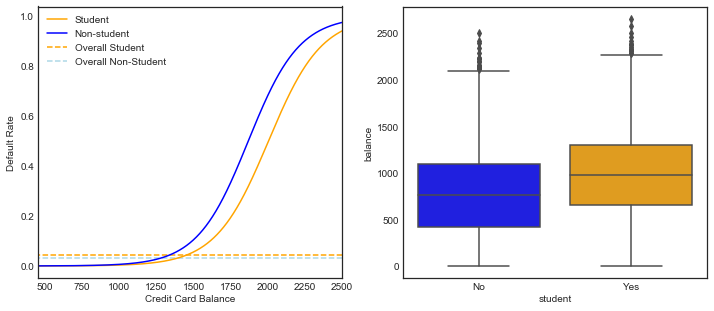

In [13]:
# plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.plot(x_test, pd.DataFrame(prob)[1], color='orange', label='Student')
ax1.plot(x_test, pd.DataFrame(prob2)[1], color='blue', label='Non-student')
ax1.hlines(127/2817, colors='orange', label='Overall Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(206/6850, colors='lightblue', label='Overall Non-Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# Right plot
sns.boxplot('student', 'balance', data=df, orient='v', ax=ax2,  palette=c_palette);

### Linear Disc. Analysis
#### 4.4

In [14]:
x = df[['balance', 'income', 'student2']].values
y = df.default2.values

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(x, y).predict(x)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


In [15]:
print(classification_report(y, y_pred, target_names=['No', 'Yes']))


              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



### 4.5

In [16]:
dec_prob = 0.2 #use 20% as probability default to be yes grammar who what????

y_prob = lda.fit(x, y).predict_proba(x)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_prob[:,1] > dec_prob})
df_.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9435,140
Yes,232,193


### 4.5.3 LDA

In [17]:
df = pd.read_csv('Data/Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)


In [18]:
x_train = df[:'2004'][['Lag1','Lag2']]
y_train = df[:'2004']['Direction']

x_test = df['2005':][['Lag1','Lag2']]
y_test = df['2005':]['Direction']

lda = LinearDiscriminantAnalysis()
pred = lda.fit(x_train, y_train).predict(x_test)

In [23]:
lda.priors_

array([0.49198397, 0.50801603])

In [24]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [25]:
lda.coef_

array([[-0.05544078, -0.0443452 ]])

In [26]:
confusion_matrix(y_test, pred).T

array([[ 35,  35],
       [ 76, 106]], dtype=int64)

In [27]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

        Down      0.500     0.315     0.387       111
          Up      0.582     0.752     0.656       141

   micro avg      0.560     0.560     0.560       252
   macro avg      0.541     0.534     0.522       252
weighted avg      0.546     0.560     0.538       252



In [29]:
pred_p = lda.predict_proba(x_test)
np.unique(pred_p[:,1]>0.5, return_counts=True)

(array([False,  True]), array([ 70, 182], dtype=int64))

In [30]:
np.unique(pred_p[:,1]>0.9, return_counts=True)

(array([False]), array([252], dtype=int64))

In [32]:
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(x_train, y_train).predict(x_test)
qda.priors_

array([0.49198397, 0.50801603])

In [33]:
qda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [34]:
confusion_matrix(y_test, pred).T

array([[ 30,  20],
       [ 81, 121]], dtype=int64)

In [35]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

        Down      0.600     0.270     0.373       111
          Up      0.599     0.858     0.706       141

   micro avg      0.599     0.599     0.599       252
   macro avg      0.600     0.564     0.539       252
weighted avg      0.599     0.599     0.559       252



# KNN YA YEEEET

In [37]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(x_train, y_train).predict(x_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[43 58]
 [68 83]]
              precision    recall  f1-score   support

        Down      0.426     0.387     0.406       111
          Up      0.550     0.589     0.568       141

   micro avg      0.500     0.500     0.500       252
   macro avg      0.488     0.488     0.487       252
weighted avg      0.495     0.500     0.497       252



In [38]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3) #more neighbors
pred = knn.fit(x_train, y_train).predict(x_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[48 55]
 [63 86]]
              precision    recall  f1-score   support

        Down      0.466     0.432     0.449       111
          Up      0.577     0.610     0.593       141

   micro avg      0.532     0.532     0.532       252
   macro avg      0.522     0.521     0.521       252
weighted avg      0.528     0.532     0.529       252



# KNN Caracan danta

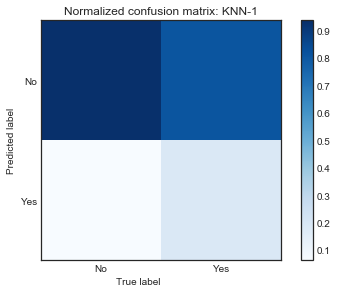

True        No  Yes
Predicted          
No         882   48
Yes         59   11
     Precision
No    0.948387
Yes   0.157143


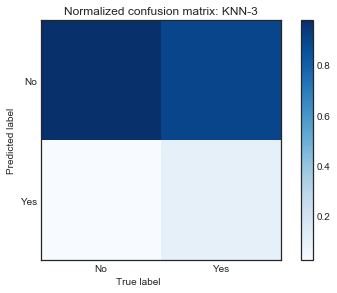

True        No  Yes
Predicted          
No         921   53
Yes         20    6
     Precision
No    0.945585
Yes   0.230769


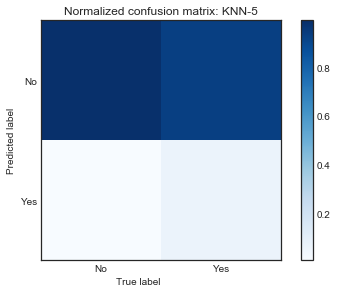

True        No  Yes
Predicted          
No         934   55
Yes          7    4
     Precision
No    0.944388
Yes   0.363636


In [40]:
df = pd.read_csv('Data/Caravan.csv')
y = df.Purchase
X = df.drop('Purchase', axis=1).astype('float64') #no need
X_scaled = preprocessing.scale(X)

X_train = X_scaled[1000:,:]
y_train = y[1000:]
X_test = X_scaled[:1000,:]
y_test = y[:1000]

def KNN(n_neighbors=1, weights='uniform'): 
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    return(pred, score, clf.classes_)

def plot_confusion_matrix(cm, classes, n_neighbors, title='Confusion matrix (Normalized)',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalized confusion matrix: KNN-{}'.format(n_neighbors))
    plt.colorbar()
    plt.xticks(np.arange(2), classes)
    plt.yticks(np.arange(2), classes)
    plt.tight_layout()
    plt.xlabel('True label',rotation='horizontal', ha='right')
    plt.ylabel('Predicted label')
    plt.show()
    
    
for i in [1,3,5]:
    pred, score, classes = KNN(i)
    cm = confusion_matrix(y_test, pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized.T, classes, n_neighbors=i)
    cm_df = pd.DataFrame(cm.T, index=classes, columns=classes)
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print(cm_df)    
    print(pd.DataFrame(precision_score(y_test, pred, average=None),
                       index=classes, columns=['Precision']))

## Logistic regression

In [45]:
regr = skl_lm.LogisticRegression(solver='liblinear')
regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
pred = regr.predict(X_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=regr.classes_,
                     columns=regr.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))

True        No  Yes
Predicted          
No         935   59
Yes          6    0
              precision    recall  f1-score   support

          No       0.94      0.99      0.97       941
         Yes       0.00      0.00      0.00        59

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.47      0.50      0.48      1000
weighted avg       0.89      0.94      0.91      1000



In [47]:
pred_p = regr.predict_proba(X_test)
cm_df = pd.DataFrame({'True': y_test, 'Pred': pred_p[:,1] > .25})
cm_df.Pred.replace(to_replace={True:'Yes', False:'No'}, inplace=True)
print(cm_df.groupby(['True', 'Pred']).size().unstack('True').T)
print(classification_report(y_test, cm_df.Pred))

Pred   No  Yes
True          
No    919   22
Yes    48   11
              precision    recall  f1-score   support

          No       0.95      0.98      0.96       941
         Yes       0.33      0.19      0.24        59

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.64      0.58      0.60      1000
weighted avg       0.91      0.93      0.92      1000

